In [1]:
import numpy as np 
import pandas as pd
import os
import zipfile as zf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'matplotlib'

1) Load bike sharing dataset 

In [2]:
files = zf.ZipFile("archive.zip", 'r')
files.extractall('bike-sharing-dataset')
files.close()

In [3]:
raw = pd.read_csv('bike-sharing-dataset/hour.csv')
raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


array([[<AxesSubplot:title={'center':'instant'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'yr'}>,
        <AxesSubplot:title={'center':'mnth'}>],
       [<AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'cnt'}>]], dtype=object)

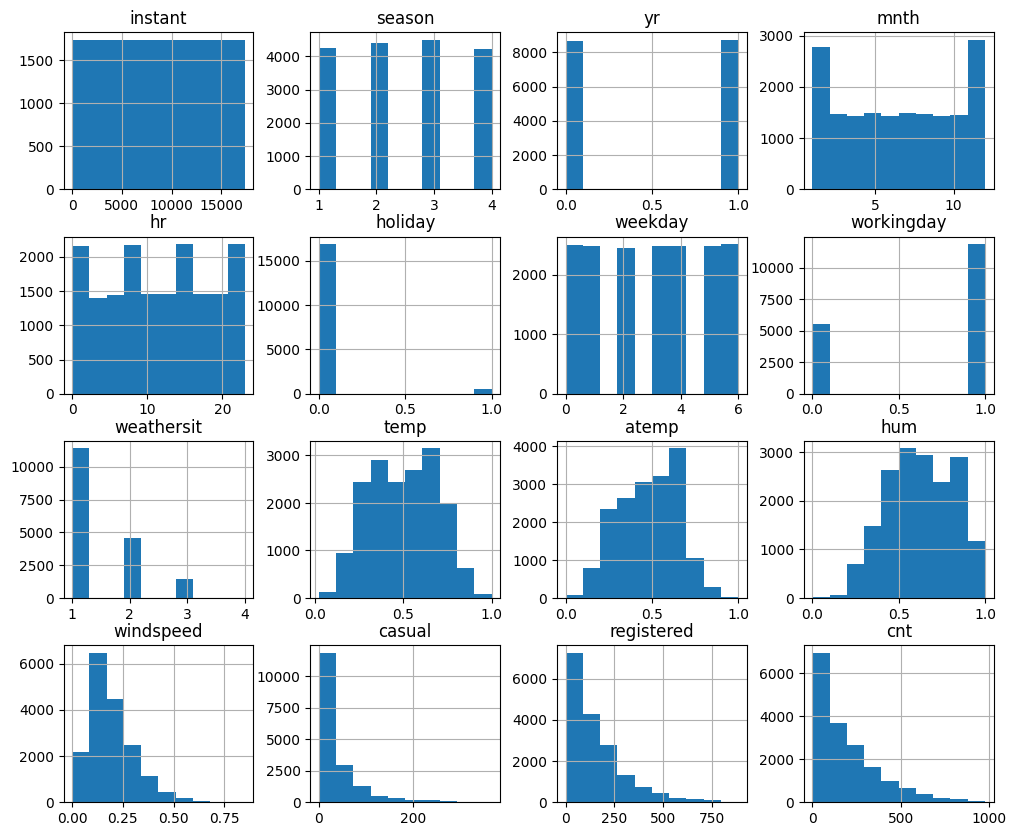

In [6]:
raw.hist(figsize=(12,10))

<AxesSubplot:>

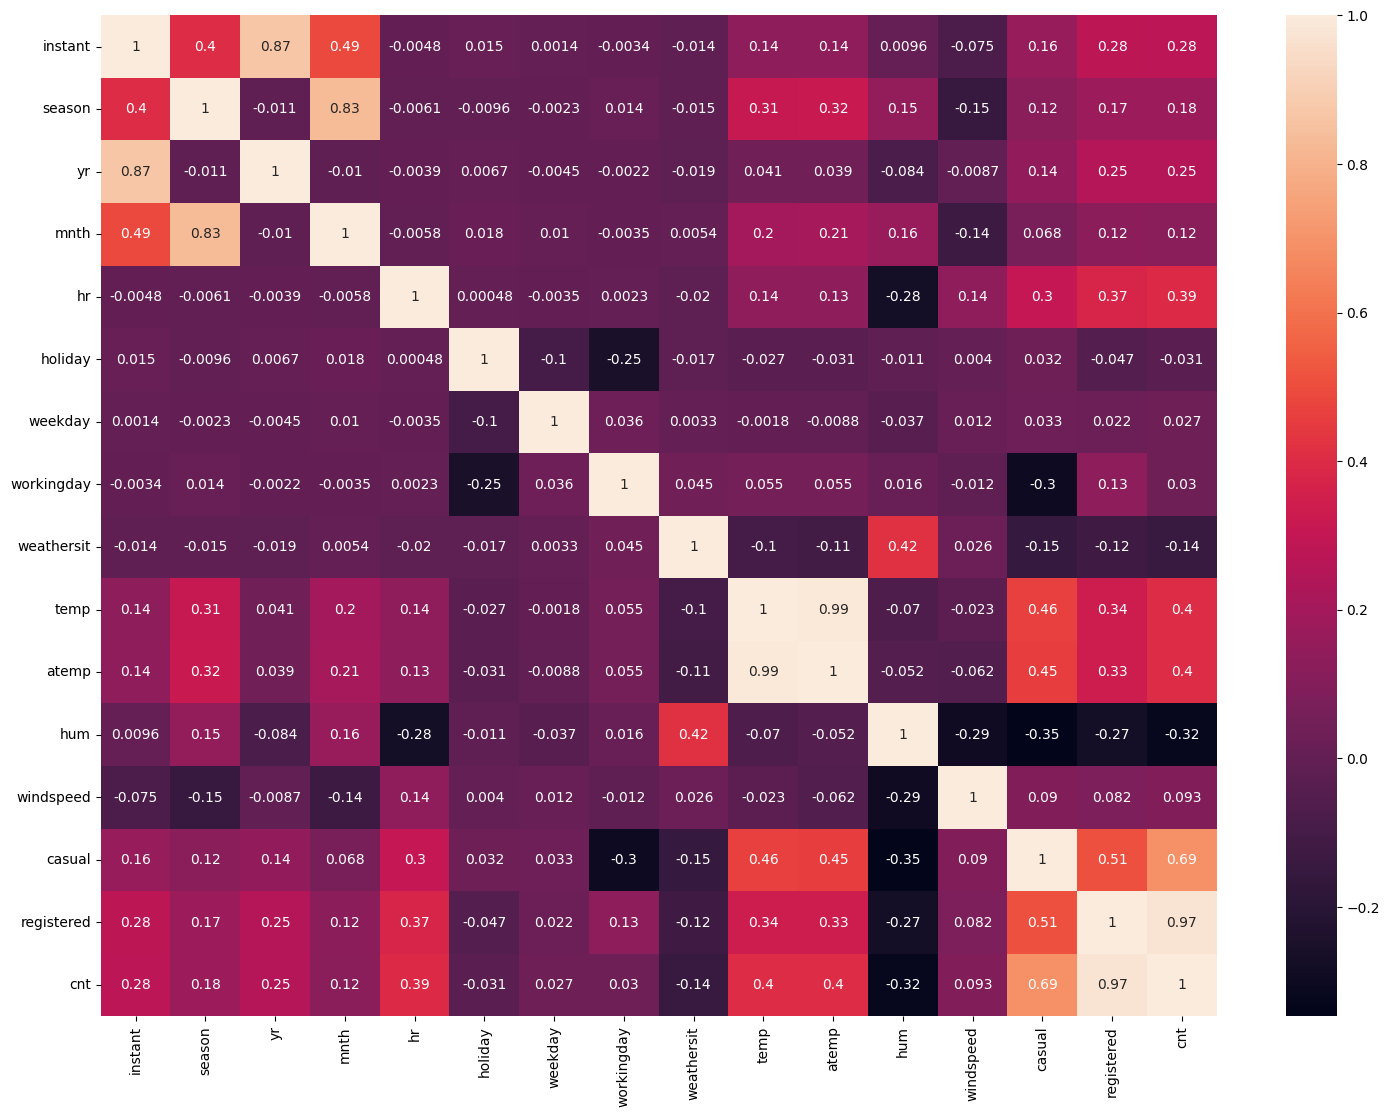

In [7]:
plt.figure(figsize=(18,13))
sns.heatmap(raw.corr(), annot=True)

In [8]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(raw)
dummy_columns = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [9]:
X.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0


In [10]:
# X['weekend'] = [1 if ((row['weekday']==5) or (row['weekday']==6)) else 0 for i, row in X.iterrows()]

In [11]:
for dummy_column in dummy_columns:
    del X[dummy_column]

In [12]:
X.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0


<AxesSubplot:xlabel='dteday'>

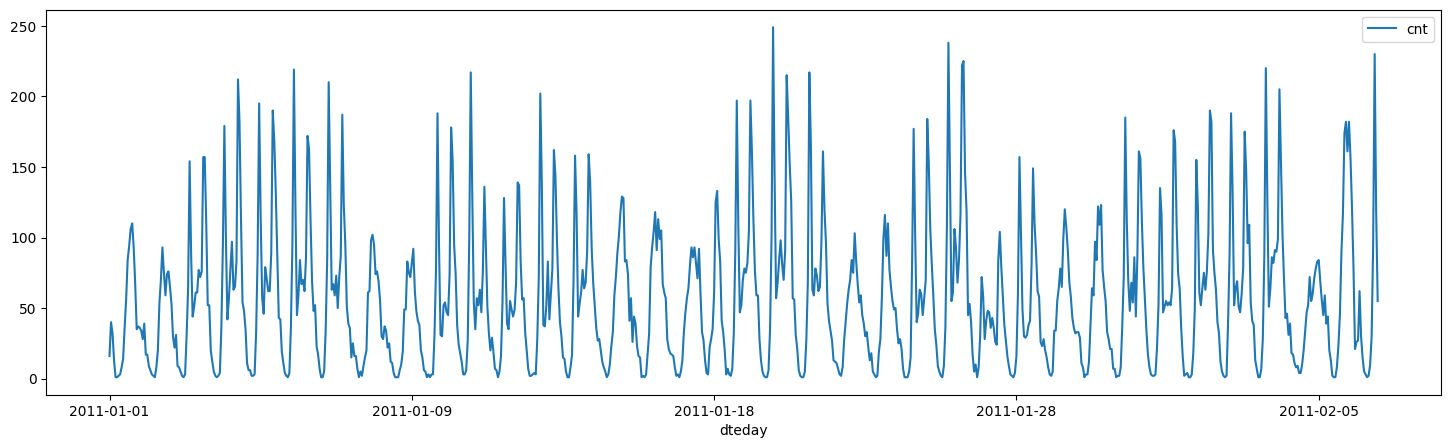

In [13]:
first_5_weeks = 5*7*24 # 3 weeks (7 days), 24 hours each day
X[:first_5_weeks].plot(x='dteday', y='cnt', figsize=(18, 5))

In [14]:
y = X['cnt']
del X['cnt']
del X['casual']
del X['registered']

In [15]:
## drop also the variables 'instant' and 'dteday' since they are irrelevant

del X['instant']
del X['dteday']

In [16]:
X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


2) Split the data set into training set and testing set, with 80% as training set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

3) Random Forest Regression model

In [18]:
# Grid Search

regressor = RandomForestRegressor()
# parameters = [{'n_estimators' : [250, 300],      # [150,200,250,300], 
#                'max_features' : [1.0],   # , 'max_features' : [0.3, 1.0 ,'sqrt','log2']}]
#                'max_samples'  : [0.25, 0.5, 1.0]}] 

parameters = [{'n_estimators' : [150,200,250,300], 
               'max_features' : [1.0 ,'sqrt','log2']}]

grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [19]:
best_parameters

{'max_features': 1.0, 'n_estimators': 200}

In [20]:
# Random Forest Regression model
# Use the best parameters found from above to build the model

regressor = RandomForestRegressor(n_estimators = best_parameters['n_estimators'], 
                                  max_features = best_parameters['max_features']) 

# regressor = RandomForestRegressor(n_estimators = best_parameters['n_estimators'], 
#                                   max_features = best_parameters['max_features'],
#                                   max_samples = best_parameters['max_samples']) 


regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_test) 

In [21]:
[estimator.tree_.max_depth for estimator in regressor.estimators_]

[43,
 43,
 44,
 42,
 43,
 45,
 41,
 44,
 43,
 45,
 40,
 43,
 44,
 45,
 45,
 44,
 44,
 40,
 43,
 42,
 42,
 41,
 40,
 41,
 45,
 40,
 44,
 43,
 40,
 43,
 43,
 44,
 44,
 46,
 41,
 42,
 42,
 44,
 40,
 44,
 43,
 44,
 43,
 44,
 41,
 42,
 40,
 43,
 47,
 40,
 42,
 43,
 43,
 42,
 41,
 43,
 41,
 42,
 41,
 40,
 43,
 41,
 41,
 42,
 41,
 42,
 42,
 44,
 43,
 41,
 42,
 44,
 41,
 42,
 46,
 41,
 43,
 42,
 42,
 40,
 42,
 40,
 43,
 43,
 44,
 42,
 41,
 44,
 44,
 43,
 42,
 42,
 43,
 47,
 42,
 40,
 39,
 42,
 41,
 40,
 42,
 42,
 42,
 41,
 42,
 45,
 42,
 41,
 40,
 43,
 42,
 40,
 43,
 42,
 45,
 42,
 41,
 45,
 42,
 43,
 43,
 44,
 42,
 42,
 42,
 44,
 44,
 43,
 43,
 41,
 41,
 45,
 45,
 45,
 45,
 42,
 42,
 42,
 41,
 44,
 43,
 42,
 41,
 41,
 44,
 38,
 40,
 43,
 42,
 40,
 41,
 43,
 43,
 43,
 43,
 43,
 41,
 41,
 42,
 41,
 43,
 42,
 41,
 41,
 43,
 41,
 41,
 39,
 44,
 41,
 41,
 43,
 42,
 41,
 43,
 40,
 41,
 43,
 41,
 39,
 44,
 41,
 43,
 44,
 44,
 42,
 43,
 40,
 40,
 43,
 42,
 44,
 43,
 41,
 40,
 43,
 42,
 41,
 43,
 41]

In [22]:
# Comparing predicted values with true values in testing set

mean_absolute_error(y_test, y_pred)

31.202538567181765

In [23]:
# Using k-fold cross validation to evaluate the performance of the model

accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
accuracy.mean()

0.9219395193119053

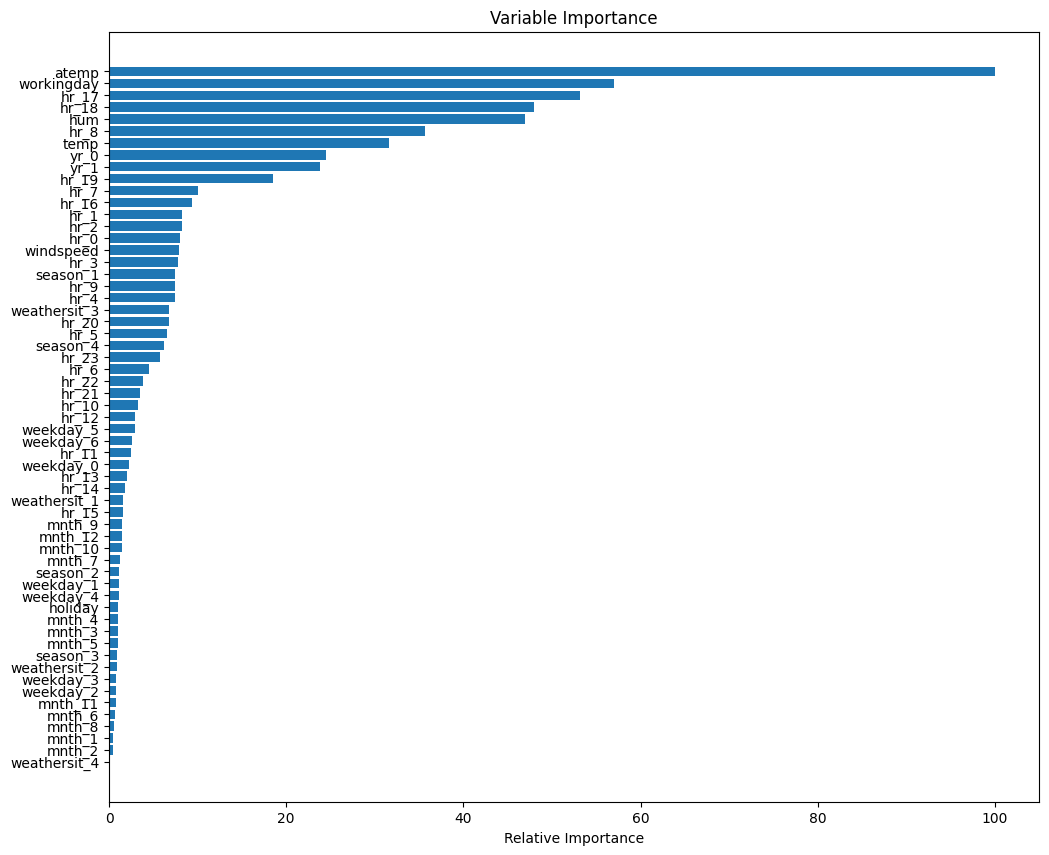

In [24]:
# Relative importance of features 

feature_importance = regressor.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Playing with the model

In [31]:
# regressor = RandomForestRegressor(n_estimators = 2000, 
#                                   max_features = 1.0,
#                                   max_samples = 1.0) 


regressor = RandomForestRegressor(n_estimators=1500, max_samples=0.5, max_features=0.5, max_depth=30)


regressor.fit(X_train,y_train)

# Predicting the values 

y_pred = regressor.predict(X_test) 

In [32]:
# Comparing predicted values with true values in testing set

mean_absolute_error(y_test, y_pred)

35.312537074710505

In [33]:
# Using k-fold cross validation to evaluate the performance of the model

accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
accuracy.mean()

0.9078308056444595

# Notes on RF

****************************
Bagging:  each decision trees are used as parallel estimators. For a classification problem, the result is based on majority vote of the results received from each decision tree. For regression, the prediction of a leaf node is the mean value of the target values in that leaf.

****************************

List of parameters: 

1) `n_estimators=100` 

    number of trees in the forest
****************************
2) `criterion='squared_error'` {"squared_error", "absolute_error", "friedman_mse", "poisson"}

    to measure model outcomes [loss function]
****************************
3) `max_depth=None`

    The maximum depth of a tree starting from 0. If `max_depth=None` the model keeps splitting until all leaves are pure 
    or until all leaves contain less than min_samples_split samples.
****************************
4) `min_samples_split=2` 

    minimum number of samples required to split an internal node
****************************
5) `min_samples_leaf=1`

    minimum number of samples in each of the left and right branches required to perform a split
****************************
6) `min_weight_fraction_leaf=0.0` 

    minimum weighted fraction of the sum total of weights of all the input samples required to be at a leaf node. 
    Samples have equal weight b y default.
****************************
7) `max_features=1.0` 

    selecting features randomly for each decision tree 
****************************
8) `max_leaf_nodes=None` 
****************************
9) `min_impurity_decrease=0.0` 

     not all splits equally reduce impurity. A node will be split if this split induces a decrease of the impurity 
     greater than or equal to `min_impurity_decrease`
****************************
10) `oob_score=False` 
    whether to use out-of-bag samples to estimate the generalization score
****************************
11) `random_state=None` 

    for replication (both for bootstrapping and feature sampling)
****************************

12) `warm_start=False` 

****************************
13) `ccp_alpha=0`

    Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity 
    that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.
****************************
14) `bootstrap=True` 

    randomly selecting samples from training data with replacement
****************************
15) `max_samples=None`

    The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole
    dataset is used to build each tree.